<a href="https://colab.research.google.com/github/Arjun650/NNDL_LAB/blob/main/NNDL_LAB_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
!kaggle datasets download -d techsash/waste-classification-data --unzip


Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 96% 409M/427M [00:04<00:00, 134MB/s]
100% 427M/427M [00:04<00:00, 99.3MB/s]


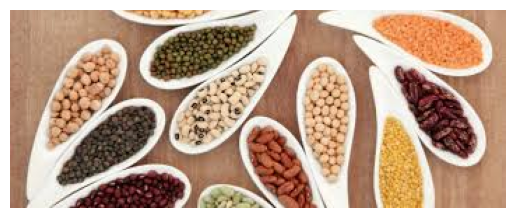

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

# Define path to images
image_folder = "DATASET/TEST/O"  # Update based on folder structure
image_files = os.listdir(image_folder)

# Read and display the first image
img_path = os.path.join(image_folder, image_files[0])
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display

plt.imshow(img)
plt.axis("off")
plt.show()

In [5]:
train_dir = '/content/DATASET/TRAIN'
test_dir = '/content/DATASET/TEST'

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)  # Splitting 20% for validation

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images to fit model input
    batch_size=32,
    class_mode='binary',  # Binary classification (O vs. R)
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Define CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3), name="conv2d_1"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same', name="conv2d_2"),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', padding='same', name="conv2d_3"),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    epochs=10,  # Adjust epochs as needed
                    validation_data=val_generator)

# Save the trained model
model.save('organic_vs_recyclable.h5')

print("Model training complete! 🎉")

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 15/565 ━━━━━━━━━━━━━━━━━━━━ 41:51 5s/step - accuracy: 0.6090 - loss: 1.1460

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

# Load your trained model
model = tf.keras.models.load_model('your_model.h5')

# Select a convolutional layer to inspect (change index as needed)
layer_name = 'conv2d'  # Replace with the actual name of the conv layer
layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

# Load and preprocess an image (ensure it has the correct input shape)
img_path = 'test_image.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))  # Adjust size as per model
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize

# Get feature maps
feature_maps = layer_model.predict(img_array)

# Get number of filters
num_filters = feature_maps.shape[-1]

# Plot feature maps
fig, axes = plt.subplots(4, 4, figsize=(10, 10))  # Adjust grid based on filters
axes = axes.flatten()

for i in range(16):  # Show first 16 feature maps
    if i < num_filters:
        axes[i].imshow(feature_maps[0, :, :, i], cmap='viridis')
    axes[i].axis('off')

plt.tight_layout()
plt.show()